In [2]:
# Data Handling and Preprocessing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score, f1_score
import joblib
# Rule-Based Expert System (Experta)
import collections
import collections.abc
collections.Mapping = collections.abc.Mapping
from experta import *


In [3]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1024 non-null   float64
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [4]:
df = df.drop_duplicates()

In [5]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.fillna(df.mean(), inplace=True)
df.dropna(inplace=True)
df["restecg"] = df["restecg"].astype(int)



In [7]:
df.isnull().sum()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', ]
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical_features] = df[categorical_features].astype('category')

print(df.dtypes)  # Now categorical features are correctly set

print("Numerical Features:", numerical_features)

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object
Numerical Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


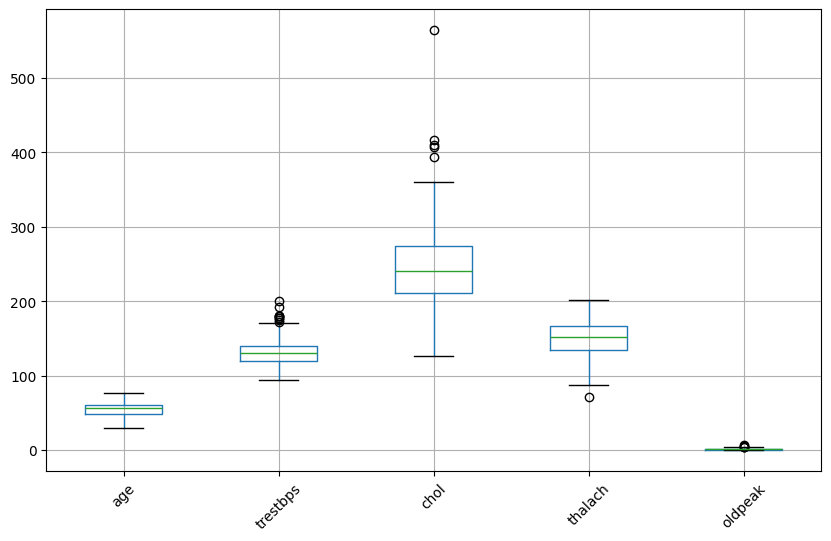

In [8]:
#boxplot to check for outliers
plt.figure(figsize=(10,6))
df[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.show()

In [9]:
#detecting outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Check outliers for each numerical column
for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in age: 0
Outliers in trestbps: 9
Outliers in chol: 5
Outliers in thalach: 1
Outliers in oldpeak: 5


In [10]:
#handling outliers based on domain lnowledge
df["trestbps"] = np.clip(df["trestbps"], 90, 180)
df["chol"] = np.clip(df["chol"], df["chol"].quantile(0.05), df["chol"].quantile(0.95))
df["thalach"] = np.clip(df["thalach"], 60, 220)
df["oldpeak"] = np.clip(df["oldpeak"], 0, df["oldpeak"].quantile(0.95))


In [11]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Create a new dataframe for the scaled features
df_scaled = df.copy()  # Make a copy of the original dataframe
df_scaled[numerical_features] = scaled_features  # Replace numerical features with scaled features

In [12]:
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0,0.360465,0.242744,0,1,0.740458,0,0.294118,2,2,3,0
1,0.500000,1,0,0.534884,0.183377,1,0,0.641221,1,0.911765,0,0,3,0
2,0.854167,1,0,0.593023,0.000000,0,1,0.412214,1,0.764706,0,0,3,0
3,0.666667,1,0,0.627907,0.183377,0,1,0.687023,0,0.000000,2,1,3,0
4,0.687500,0,0,0.511628,0.783641,1,1,0.267176,0,0.558824,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,0.312500,0,2,0.162791,0.000000,0,1,0.793893,0,0.176471,1,0,2,1
739,0.479167,1,0,0.395349,0.526385,0,1,0.687023,1,0.000000,2,1,3,0
843,0.625000,1,3,0.767442,0.645119,0,0,0.412214,0,0.000000,2,0,2,0
873,0.583333,1,0,0.534884,0.110818,0,1,0.587786,0,0.117647,1,0,1,1


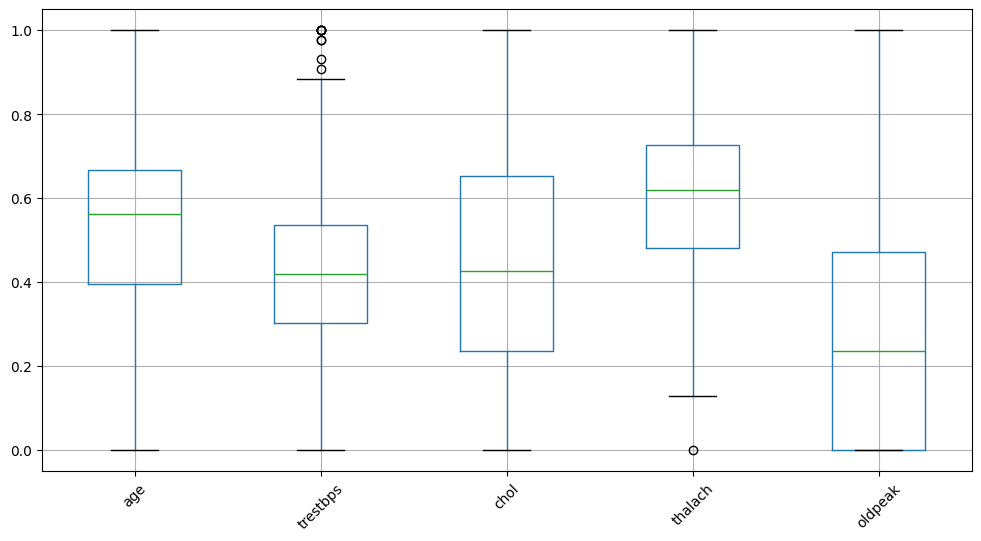

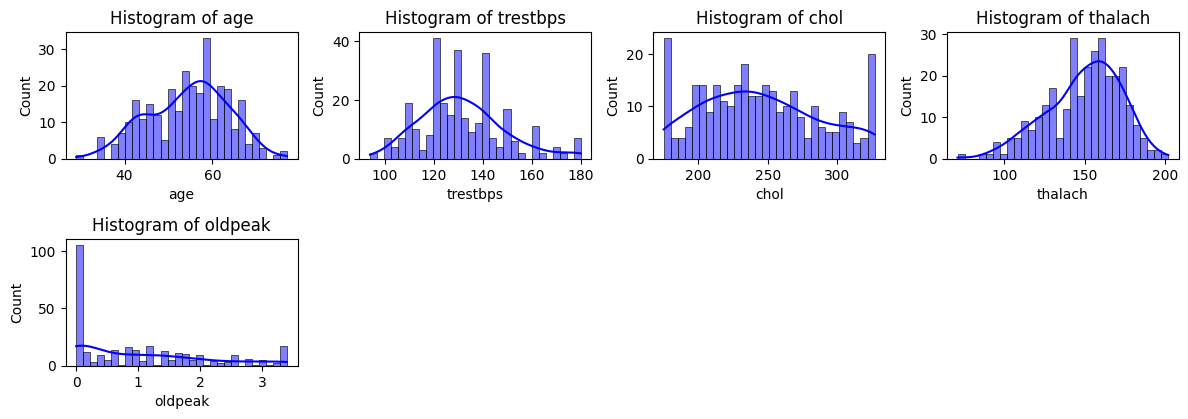

In [13]:
plt.figure(figsize=(12,6))
df_scaled[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')  # kde=True adds a smooth density curve
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

In [14]:
#check outliers after cleaning
for col in numerical_features:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in age: 0
Outliers in trestbps: 9
Outliers in chol: 0
Outliers in thalach: 1
Outliers in oldpeak: 0


In [15]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       305 non-null    float64 
 1   sex       305 non-null    category
 2   cp        305 non-null    category
 3   trestbps  305 non-null    float64 
 4   chol      305 non-null    float64 
 5   fbs       305 non-null    category
 6   restecg   305 non-null    category
 7   thalach   305 non-null    float64 
 8   exang     305 non-null    category
 9   oldpeak   305 non-null    float64 
 10  slope     305 non-null    category
 11  ca        305 non-null    category
 12  thal      305 non-null    category
 13  target    305 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 20.3 KB


In [16]:
#one-hot encoding
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype = int)

print(df.head())  # Check the transformed dataset


   age  trestbps   chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0   52       125  212.0      168      1.0       0      1     0     0     0   
1   53       140  203.0      155      3.1       0      1     0     0     0   
2   70       145  175.2      125      2.6       0      1     0     0     0   
3   61       148  203.0      161      0.0       0      1     0     0     0   
4   62       138  294.0      106      1.9       0      0     0     0     0   

   ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  thal_2  \
0  ...        0        0        1     0     1     0     0       0       0   
1  ...        1        0        0     0     0     0     0       0       0   
2  ...        1        0        0     0     0     0     0       0       0   
3  ...        0        0        1     1     0     0     0       0       0   
4  ...        0        1        0     0     0     1     0       0       1   

   thal_3  
0       1  
1       1  
2       1  
3       1  
4       

In [17]:
#one-hot encoding
df_scaled = pd.get_dummies(df_scaled, columns=categorical_features, drop_first=True, dtype = int)

print(df_scaled.head())  # Check the transformed dat

        age  trestbps      chol   thalach   oldpeak  target  sex_1  cp_1  \
0  0.479167  0.360465  0.242744  0.740458  0.294118       0      1     0   
1  0.500000  0.534884  0.183377  0.641221  0.911765       0      1     0   
2  0.854167  0.593023  0.000000  0.412214  0.764706       0      1     0   
3  0.666667  0.627907  0.183377  0.687023  0.000000       0      1     0   
4  0.687500  0.511628  0.783641  0.267176  0.558824       0      0     0   

   cp_2  cp_3  ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca_3  ca_4  thal_1  \
0     0     0  ...        0        0        1     0     1     0     0       0   
1     0     0  ...        1        0        0     0     0     0     0       0   
2     0     0  ...        1        0        0     0     0     0     0       0   
3     0     0  ...        0        0        1     1     0     0     0       0   
4     0     0  ...        0        1        0     0     0     1     0       0   

   thal_2  thal_3  
0       0       1  
1       0       

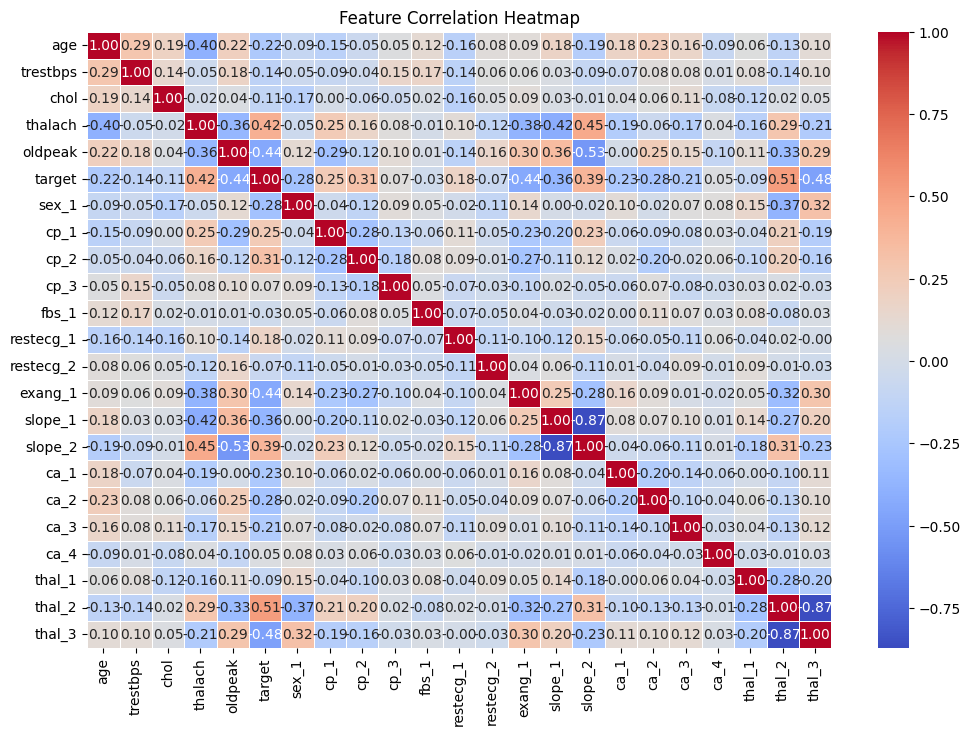

In [18]:
# Compute correlation matrix
correlation_matrix = df_scaled.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
# Get correlation of features with 'target'
target_correlation = correlation_matrix["target"].sort_values(ascending=False)

print(target_correlation)

target       1.000000
thal_2       0.510987
thalach      0.419045
slope_2      0.392221
cp_2         0.314025
cp_1         0.247935
restecg_1    0.181207
cp_3         0.073709
ca_4         0.048353
fbs_1       -0.034660
restecg_2   -0.067315
thal_1      -0.089255
chol        -0.113585
trestbps    -0.139327
ca_3        -0.207848
age         -0.222436
ca_1        -0.234955
ca_2        -0.277773
sex_1       -0.284274
slope_1     -0.360740
exang_1     -0.435867
oldpeak     -0.440394
thal_3      -0.477569
Name: target, dtype: float64


In [20]:
# Select important features based on correlation
important_features = ["thal_2", "thalach", "slope_2", "cp_2"]
df_selected = df[important_features + ["target"]]  # Keep only important features + target


In [21]:
df_scaled.to_csv("cleaned_data_1.csv", index=False)

In [22]:
df_scaled.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.479167,0.360465,0.242744,0.740458,0.294118,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,0.500000,0.534884,0.183377,0.641221,0.911765,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.854167,0.593023,0.000000,0.412214,0.764706,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.666667,0.627907,0.183377,0.687023,0.000000,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.687500,0.511628,0.783641,0.267176,0.558824,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [23]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212.0,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203.0,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,175.2,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203.0,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,138,294.0,106,1.9,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [24]:
df_selected.head()

,thal_2,thalach,slope_2,cp_2,target
0,0,168,1,0,0
1,0,155,0,0,0
2,0,125,0,0,0
3,0,161,1,0,0
4,1,106,0,0,0


In [25]:
print("🔹 Statistical Summary:\n", df_selected.describe())

🔹 Statistical Summary:
            thal_2     thalach     slope_2        cp_2      target
count  305.000000  305.000000  305.000000  305.000000  305.000000
mean     0.547541  149.531148    0.462295    0.281967    0.540984
std      0.498553   22.794127    0.499396    0.450697    0.499136
min      0.000000   71.000000    0.000000    0.000000    0.000000
25%      0.000000  134.000000    0.000000    0.000000    0.000000
50%      1.000000  152.000000    0.000000    0.000000    1.000000
75%      1.000000  166.000000    1.000000    1.000000    1.000000
max      1.000000  202.000000    1.000000    1.000000    1.000000


🔹 Statistical Summary:
            thal_2     thalach     slope_2        cp_2      target
count  305.000000  305.000000  305.000000  305.000000  305.000000
mean     0.547541  149.531148    0.462295    0.281967    0.540984
std      0.498553   22.794127    0.499396    0.450697    0.499136
min      0.000000   71.000000    0.000000    0.000000    0.000000
25%      0.000000  134.000000    0.000000    0.000000    0.000000
50%      1.000000  152.000000    0.000000    0.000000    1.000000
75%      1.000000  166.000000    1.000000    1.000000    1.000000
max      1.000000  202.000000    1.000000    1.000000    1.000000


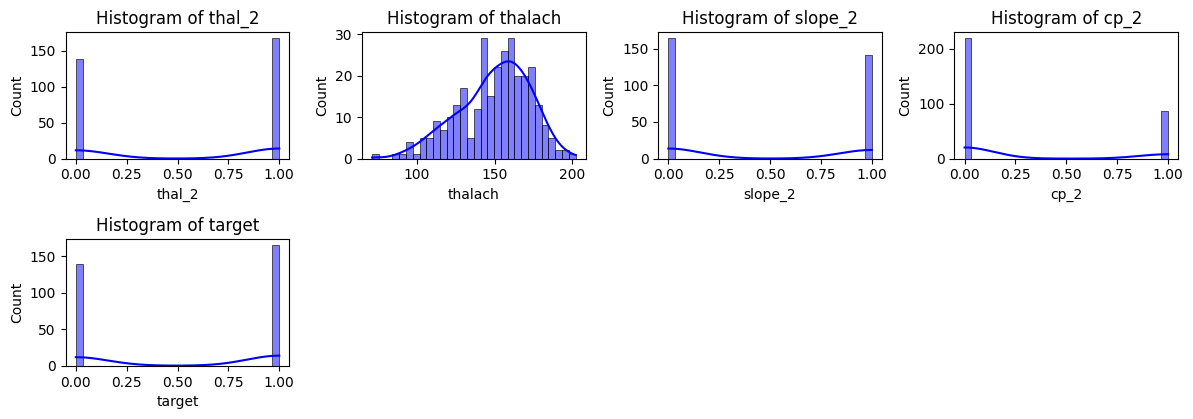

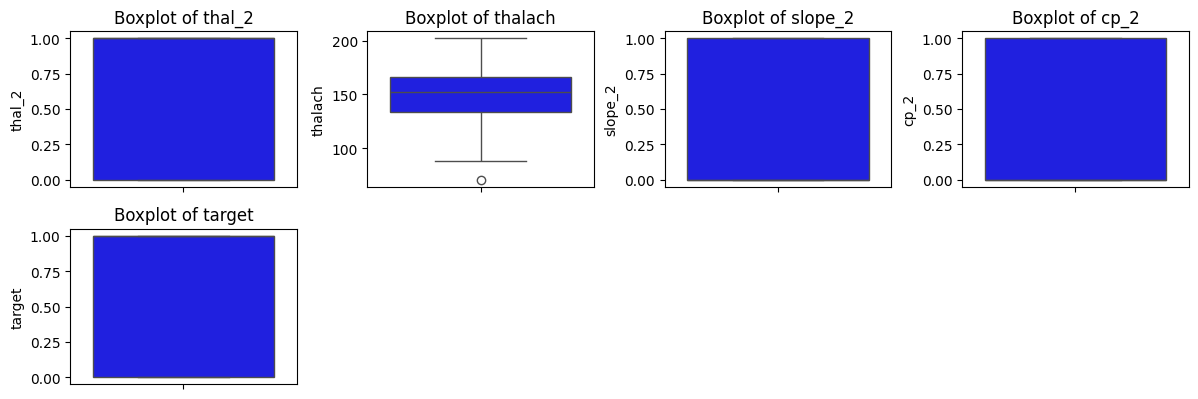

In [26]:
# Display statistical summary
print("🔹 Statistical Summary:\n", df_selected.describe())

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_selected.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_selected[col], bins=30, kde=True, color='blue')  # kde=True adds a smooth density curve
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

# Plot boxplots for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_selected.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_selected[col], color='blue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

C:\Users\co.magic\AppData\Local\Temp\ipykernel_22332\2457595192.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


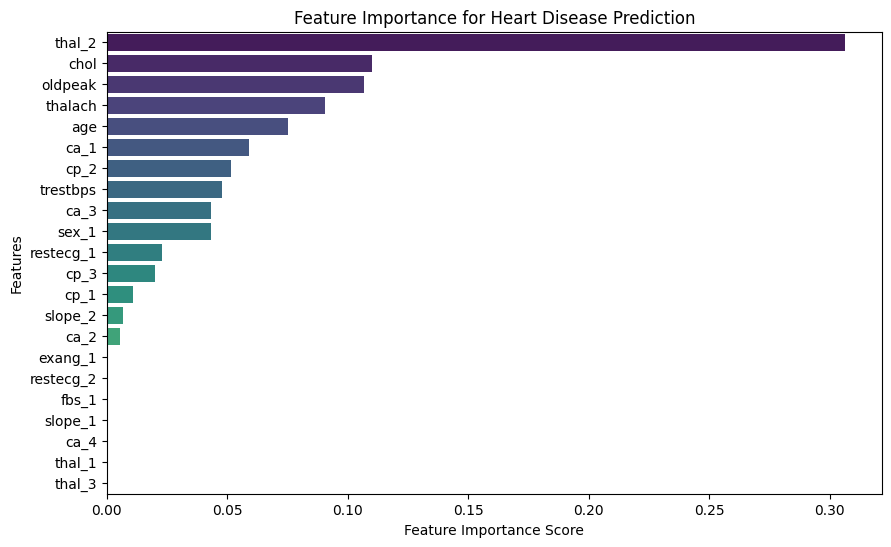

In [27]:
X = df_scaled.drop(columns=["target"])  # Independent variables
y = df_scaled["target"]  # Dependent variable (Heart Disease: 0 = No, 1 = Yes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})

# Sort by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()

In [ ]:
X = df_scaled.drop(columns=["target"])  # Independent variables
y = df_scaled["target"]  # Dependent variable (Heart Disease: 0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model: Train a Decision Tree Classifier on the dataset
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Hyperparameter Tuning: Optimize tree depth and min samples per split
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate Model: Measure performance using accuracy, precision, recall, and F1-score
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"✅ Best Hyperparameters: {grid_search.best_params_}")

# Save Model: Export the trained model using joblib
joblib.dump(best_model, 'decision_tree_model.joblib')

Accuracy: 0.77
Precision: 0.71
Recall: 0.86
F1-score: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61


Confusion Matrix:
[[22 10]
 [ 4 25]]
✅ Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}


['decision_tree_model.joblib']

In [ ]:
# Assuming 'X' and 'y' are your dataset features and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model if not trained already
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Save and load the model to ensure availability
joblib.dump(decision_tree_model, "decision_tree_model.pkl")
decision_tree_model = joblib.load("decision_tree_model.pkl")

y_pred_dt = decision_tree_model.predict(X_val)

def expert_system_predict(X):
    """ Simulated expert system predictions based on rule-based conditions. """
    predictions = []
    for _, row in X.iterrows():
        if row['age'] > 50 and row['chol'] > 200:
            predictions.append(1)  # High risk
        else:
            predictions.append(0)  # Low risk
    return predictions

y_pred_expert = expert_system_predict(X_val)

# Compute metrics
accuracy_dt = accuracy_score(y_val, y_pred_dt)
accuracy_expert = accuracy_score(y_val, y_pred_expert)

print("Decision Tree Model Performance:")
print(classification_report(y_val, y_pred_dt))
print(f"Accuracy: {accuracy_dt:.2f}\n")

print("Expert System Performance:")
print(classification_report(y_val, y_pred_expert))
print(f"Accuracy: {accuracy_expert:.2f}\n")

# Explainability comparison
print("\nExplainability Analysis:")
print("- Decision Tree provides a structured flow of decisions based on data.")
print("- Expert System follows human-defined rules, making it more interpretable but potentially less flexible.")

Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        32
           1       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

Accuracy: 0.79

Expert System Performance:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        32
           1       0.00      0.00      0.00        29

    accuracy                           0.52        61
   macro avg       0.26      0.50      0.34        61
weighted avg       0.28      0.52      0.36        61

Accuracy: 0.52


Explainability Analysis:
- Decision Tree provides a structured flow of decisions based on data.
- Expert System follows human-defined rules, making it more interpretable but potentially less flexible.


c:\Users\co.magic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\co.magic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\co.magic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av